# Data Analysis jobs.ch
data from 8.1.2025

In [220]:
import pandas as pd
import json
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt 

In [221]:
parent_dir = os.getcwd()

file_path = os.path.join(parent_dir, '..', 'data', 'jobs_processed.json')

with open(file_path, 'r') as file:
    jobs = json.load(file)

df = pd.DataFrame(jobs)

df.head()

,url,downloaded,search_query,publication_date,workload,contract_type,language,place_of_work,job_title,company,descriptions,programming_languages,frameworks,tools,operating_systems,years,job_title_cleaned,career_stage_cleaned,education,salary
0,https://www.jobs.ch/en/vacancies/detail/b269d1...,True,software engineer,24 January 2025,100%,Unlimited employment,"German (Native language), English (Fluent)","Hinterbergstrasse 18, 6312 Steinhausen",Software Engineer Mobile,CyOne Security AG,[{'0': ['Mitarbeit bei der Neuentwicklung eine...,"[C, C++]",[],[CI/CD],[Linux],[],Software Engineer,None,[Bachelor],NaN
1,https://www.jobs.ch/en/vacancies/detail/21771c...,True,software engineer,05 February 2025,80 – 100%,Unlimited employment,German (Fluent),"Uttigenstrasse 36, 3600 Thun",Software Engineer C2I,RUAG AG,[{'0': ['Als Software Engineer eines grossen m...,"[C, C++, Java]",[Angular],[],[],[],Software Engineer,None,[Vocational],NaN
2,https://www.jobs.ch/en/vacancies/detail/1277f0...,True,software engineer,03 February 2025,100%,Unlimited employment,"German (Fluent), English (Fluent)","Spitalstrasse 38, 8630 Rüti ZH",Automation Software Engineer,PackSys Global AG,"[{'0': ['Du entwickelst, simulierst und testes...",[R],[],[],[],[],Software Engineer,None,[],NaN
3,https://www.jobs.ch/en/vacancies/detail/c4ba7c...,True,software engineer,13 January 2025,100%,Unlimited employment,"German (Intermediate), English (Intermediate)","Durachweg 13, 8200 Schaffhausen",Software Engineer (C++),Urban Games GmbH,[{'0': ['Implement user stories and gameplay f...,"[C, C++, Lua]",[],[],[],[3],Software Engineer,None,[Master],NaN
4,https://www.jobs.ch/en/vacancies/detail/d94c7c...,True,software engineer,15 January 2025,80 – 100%,Unlimited employment,"German (Fluent), English (Fluent)",Aarau,Fullstack Software Engineer,Helbling Technik,[{'0': ['Praktische Erfahrungen in der agilen ...,"[C, C++, HTML, Java, JavaScript]","[Angular, React]",[],[],[],Software Engineer,None,[],NaN


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   url                    999 non-null    object
 1   downloaded             999 non-null    bool  
 2   search_query           999 non-null    object
 3   publication_date       991 non-null    object
 4   workload               999 non-null    object
 5   contract_type          972 non-null    object
 6   language               788 non-null    object
 7   place_of_work          999 non-null    object
 8   job_title              999 non-null    object
 9   company                984 non-null    object
 10  descriptions           999 non-null    object
 11  programming_languages  999 non-null    object
 12  frameworks             999 non-null    object
 13  tools                  999 non-null    object
 14  operating_systems      999 non-null    object
 15  years                  

In [223]:
# List of Swiss canton names and abbreviations
cantons = [
    "Aargau", "AG", "Appenzell Ausserrhoden", "AI", "Appenzell Innerrhoden", 
    "AR", "Basel-Landschaft", "BL", "Basel-Stadt", "BS", "Bern", "BE", "Fribourg", 
    "FR", "Geneva", "GE", "Glarus", "GL", "Graubünden", "GR", "Jura", "JU", "Luzern", 
    "LU", "Neuchâtel", "NE", "Nidwalden", "NW", "Obwalden", "OW", "Schaffhausen", 
    "SH", "Schwyz", "SZ", "Solothurn", "SO", "St. Gallen", "SG", "Ticino", "TI", 
    "Thurgau", "TG", "Uri", "UR", "Valais", "VS", "Vaud", "VD", "Zug", "ZG", 
    "Zurich", "ZH"
]

# Create a dictionary of abbreviations mapping to full canton names
canton_dict = {
    "AG": "Aargau", "AI": "Appenzell Ausserrhoden", "AR": "Appenzell Innerrhoden", 
    "BL": "Basel-Landschaft", "BS": "Basel-Stadt", "BE": "Bern", "FR": "Fribourg", 
    "GE": "Geneva", "GL": "Glarus", "GR": "Graubünden", "JU": "Jura", "LU": "Luzern", 
    "NE": "Neuchâtel", "NW": "Nidwalden", "OW": "Obwalden", "SH": "Schaffhausen", 
    "SZ": "Schwyz", "SO": "Solothurn", "SG": "St. Gallen", "TI": "Ticino", 
    "TG": "Thurgau", "UR": "Uri", "VS": "Valais", "VD": "Vaud", "ZG": "Zug", 
    "ZH": "Zurich"
}

def extract_canton(address):
    address_lower = address.lower()  # Make address lowercase for easier matching
    for canton in cantons:
        # Match canton names or abbreviations (case-insensitive)
        if re.search(r"\b" + re.escape(canton.lower()) + r"\b", address_lower):
            return canton_dict.get(canton.upper(), canton)  # Ensure abbreviation maps to full name
    return None  # If no canton is found

# Apply the function to extract canton
df["canton"] = df["place_of_work"].apply(extract_canton)

In [224]:
# data cleaning
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%d %B %Y')
df["years"] = df["years"].apply(lambda x: [i for i in x if i <20]) # filter experience larger than 20 out
df["max_years"] = df["years"].apply(lambda x: max(x) if x else 0)
df["career_stage_cleaned"] = df["career_stage_cleaned"].apply(lambda x: x if x else "Not Explicit")


In [225]:
"""
for i in df['job_title'][df['job_title_cleaned'].isnull()]:
    print(i)
"""

"\nfor i in df['job_title'][df['job_title_cleaned'].isnull()]:\n    print(i)\n"

In [226]:
df["workload"].value_counts()

workload
80 – 100%    496
100%         408
60 – 100%     44
40 – 100%     13
80%            6
70 – 100%      6
50 – 100%      5
40 – 60%       4
60 – 80%       4
60%            2
40%            2
20%            1
20 – 40%       1
20 – 100%      1
30%            1
50%            1
50 – 60%       1
90%            1
90 – 100%      1
60 – 70%       1
Name: count, dtype: int64

In [227]:
df_small = df[df['job_title_cleaned'].notnull()] # filter only jobs that are CS related (by job title)
df_small = df_small[df_small['publication_date']>='2025-01-01'] # filter only jobs that are published after 2020

In [228]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   url                    493 non-null    object        
 1   downloaded             493 non-null    bool          
 2   search_query           493 non-null    object        
 3   publication_date       493 non-null    datetime64[ns]
 4   workload               493 non-null    object        
 5   contract_type          487 non-null    object        
 6   language               393 non-null    object        
 7   place_of_work          493 non-null    object        
 8   job_title              493 non-null    object        
 9   company                488 non-null    object        
 10  descriptions           493 non-null    object        
 11  programming_languages  493 non-null    object        
 12  frameworks             493 non-null    object        
 13  tools     

## Job title

<Axes: xlabel='Count', ylabel='job_title_cleaned'>

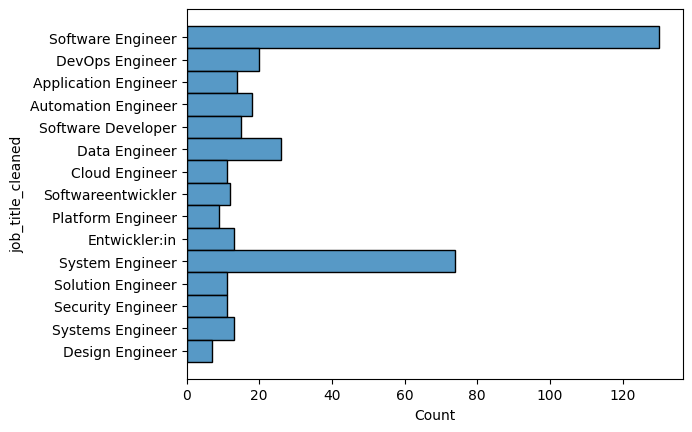

In [229]:
job_counts = df_small['job_title_cleaned'].value_counts()
sns.histplot(data = df_small[df_small['job_title_cleaned'].isin(job_counts.nlargest(15).index)], y = "job_title_cleaned")

## Workplace

<Axes: xlabel='Count', ylabel='canton'>

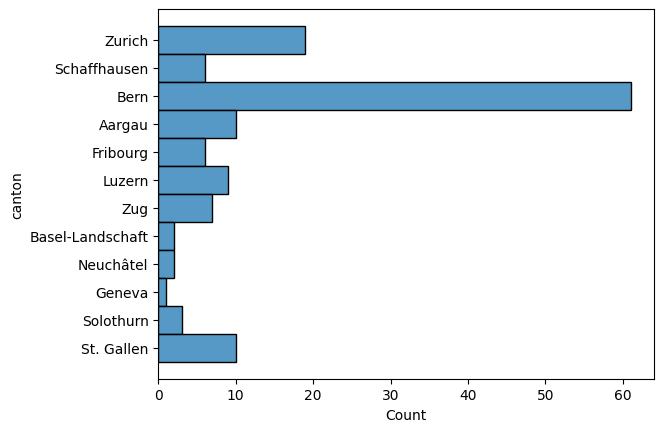

In [230]:
sns.histplot(data = df_small, y = "canton")

## Employer

<Axes: xlabel='Count', ylabel='company'>

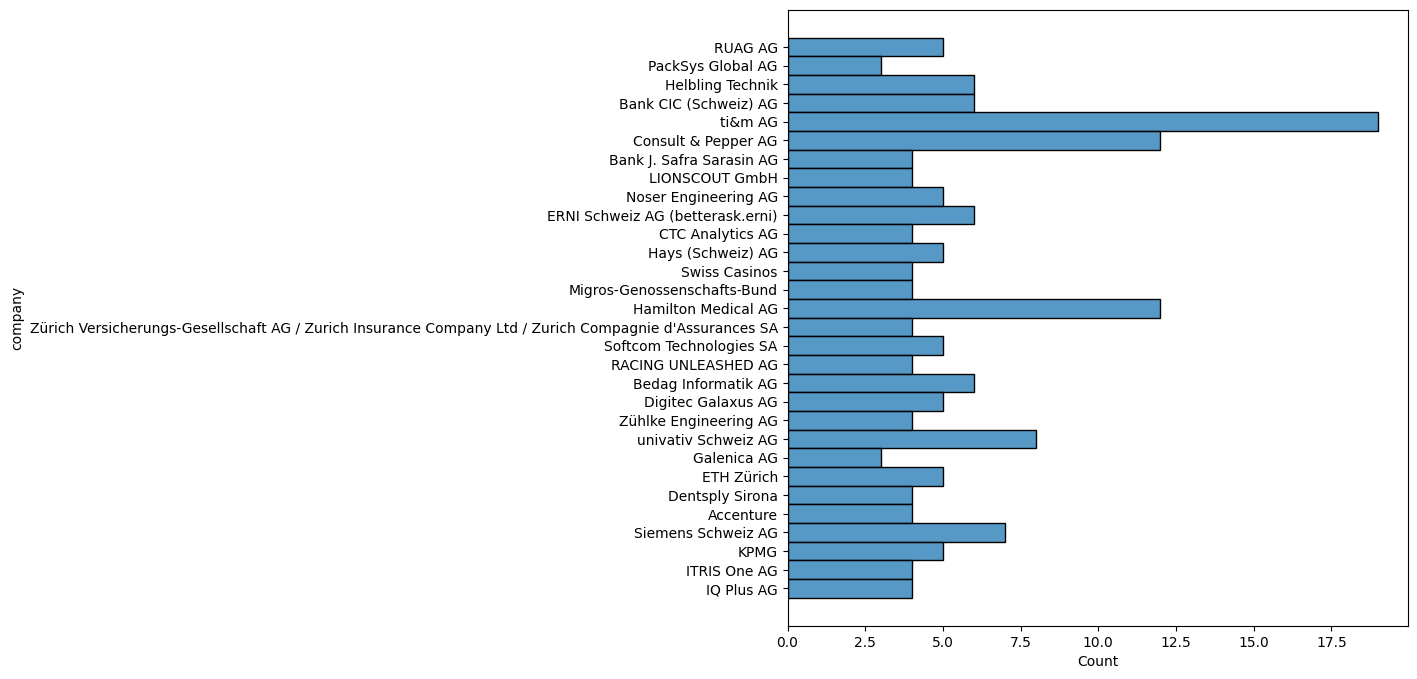

In [231]:
company_counts = df_small['company'].value_counts()
company_hist_df = df_small[df_small['company'].isin(company_counts.nlargest(30).index)]
plt.figure(figsize=(8, 8))
sns.histplot(data =company_hist_df, y = "company")

## Job Level

<Axes: xlabel='Count', ylabel='max_years'>

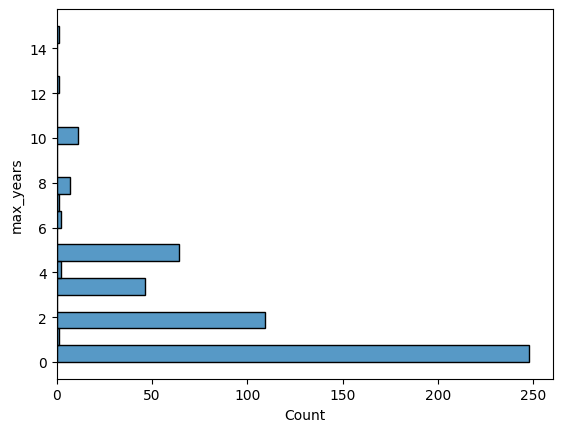

In [232]:
sns.histplot(data =df_small, y = "max_years")

<Axes: xlabel='max_years', ylabel='career_stage_cleaned'>

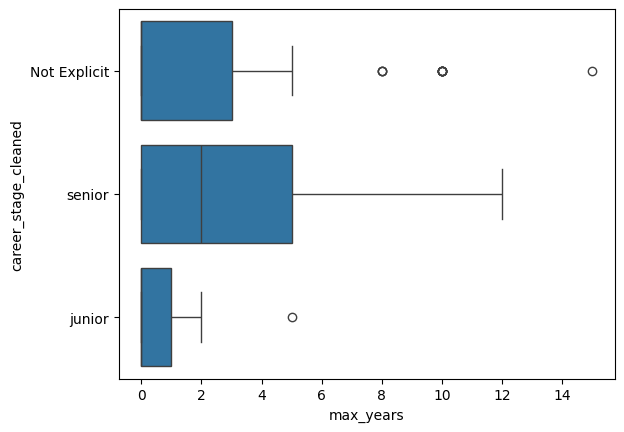

In [233]:
sns.boxplot(data =df_small, x = "max_years", y="career_stage_cleaned")

In [234]:
df_small.groupby(["career_stage_cleaned" ])["max_years"].describe()

,count,mean,std,min,25%,50%,75%,max
career_stage_cleaned,,,,,,,,
Not Explicit,371.0,1.603774,2.242558,0.0,0.0,0.0,3.0,15.0
junior,7.0,1.000000,1.914854,0.0,0.0,0.0,1.0,5.0
senior,115.0,2.565217,2.841208,0.0,0.0,2.0,5.0,12.0


## Time

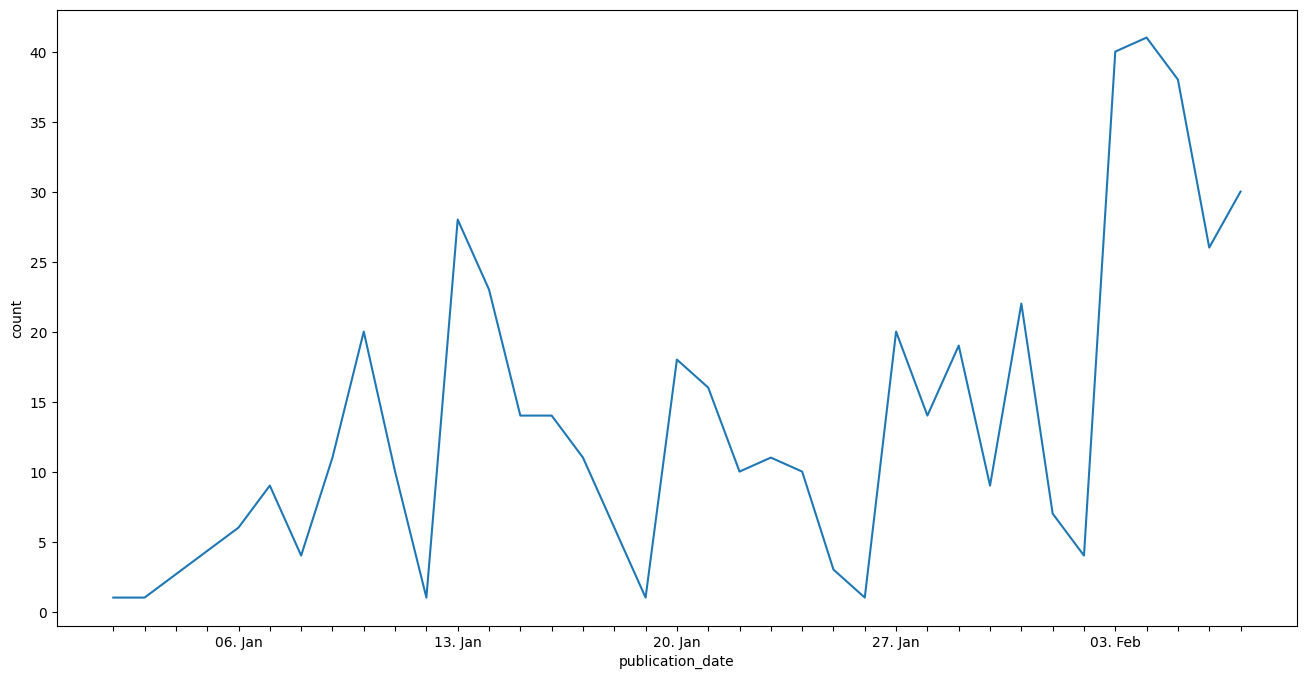

In [235]:
df_grouped = df.groupby(df_small['publication_date'].dt.to_period('D')).size().reset_index(name='count')
df_grouped['publication_date'] = df_grouped['publication_date'].dt.start_time
plt.figure(figsize=(16, 8))

sns.lineplot(data=df_grouped, x='publication_date', y='count')


plt.xticks(
    ticks=pd.date_range(df_grouped['publication_date'].min(), df_grouped['publication_date'].max(), freq='D'),
    labels=['' if d.weekday() != 0 else d.strftime('%d. %b') for d in pd.date_range(df_grouped['publication_date'].min(), df_grouped['publication_date'].max(), freq='D')],
    rotation=0
)
plt.show()

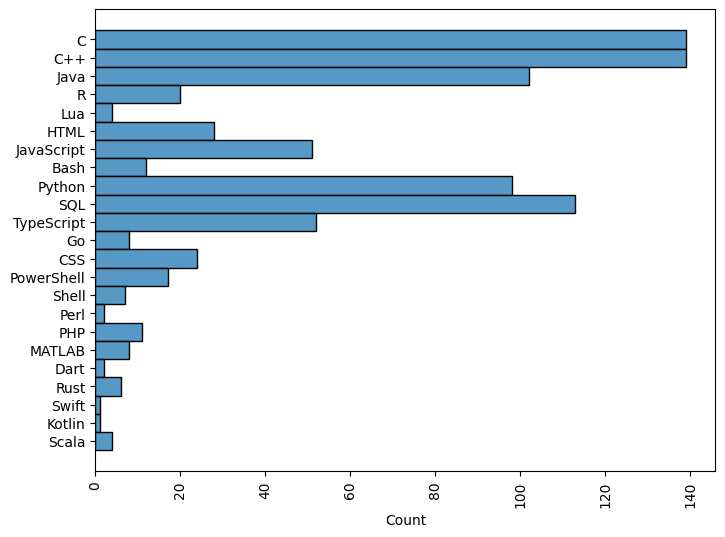

In [236]:
flat_list = [item for sublist in df_small["programming_languages"] for item in sublist]
plt.figure(figsize=(8, 6))
sns.histplot(y = flat_list, bins=10)
plt.xticks(rotation=90)
plt.show()


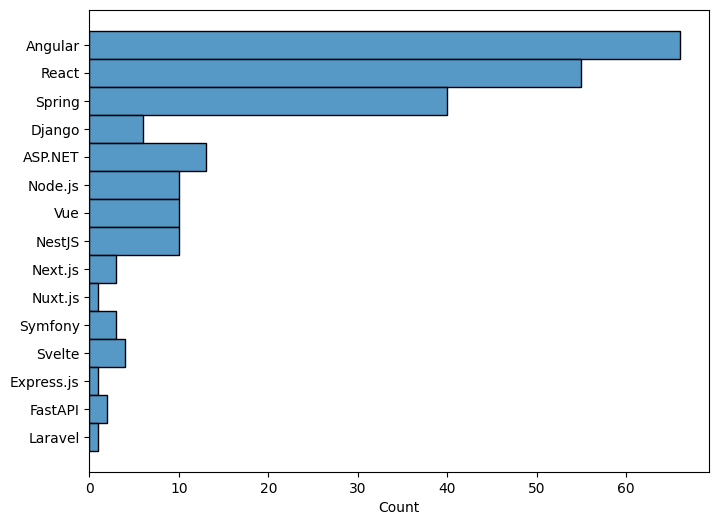

In [237]:
## Skills
flat_list = [item for sublist in df_small["frameworks"] for item in sublist]
plt.figure(figsize=(8, 6))
sns.histplot(y = flat_list, bins=10)
plt.show()


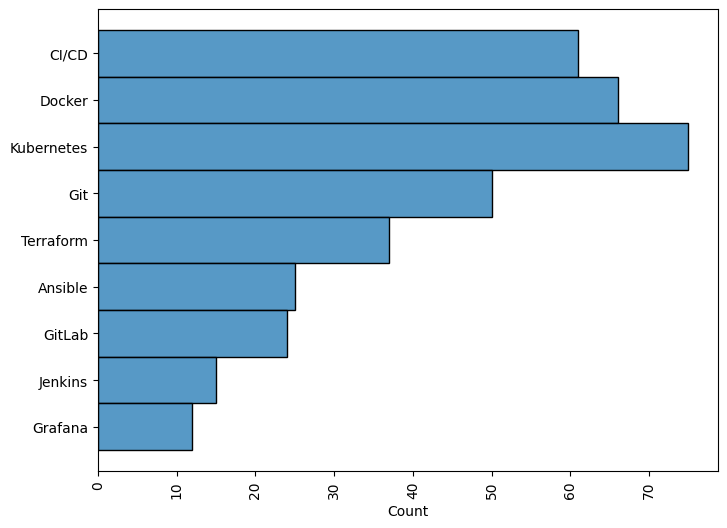

In [238]:
## Skills
flat_list = [item for sublist in df_small["tools"] for item in sublist]
plt.figure(figsize=(8, 6))
sns.histplot(y = flat_list, kde=False, bins=10)
plt.xticks(rotation=90)
plt.show()


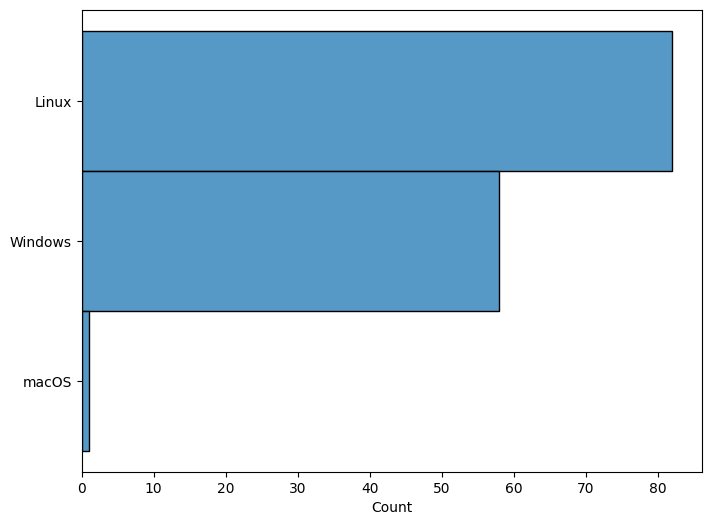

In [239]:

flat_list = [item for sublist in df_small["operating_systems"] for item in sublist]
plt.figure(figsize=(8, 6))
sns.histplot(y = flat_list, bins=10)

plt.show()